In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
%matplotlib inline


In [ ]:
matches_2020 = pd.read_csv("/content/drive/MyDrive/ipl analysis/2020-data/IPL Matches 2008-2020.csv")
matches_2020.replace({'Rising Pune Supergiant': 'Rising Pune Supergiants', 'Delhi Daredevils':'Delhi Daredevils/Capitals', 'Delhi Capitals':'Delhi Daredevils/Capitals'}, inplace =True)
matches_2020.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils/Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils/Capitals,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
ball_data_2020 = pd.read_csv("/content/drive/MyDrive/ipl analysis/2020-data/IPL Ball-by-Ball 2008-2020.csv")
ball_data_2020.replace({'Rising Pune Supergiant': 'Rising Pune Supergiants','Delhi Daredevils':'Delhi Daredevils/Capitals', 'Delhi Capitals':'Delhi Daredevils/Capitals'}, inplace =True)
ball_data_2020.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [ ]:
matches_played=pd.concat([matches_2020['team1'],matches_2020['team2']])
matches_played = matches_played.value_counts().reset_index()
matches_played.columns = ['Team', 'No_of_matches_played']
matches_played

,Team,No_of_matches_played
0,Mumbai Indians,203
1,Royal Challengers Bangalore,195
2,Delhi Daredevils/Capitals,194
3,Kolkata Knight Riders,192
4,Kings XI Punjab,190
5,Chennai Super Kings,178
6,Rajasthan Royals,161
7,Sunrisers Hyderabad,124
8,Deccan Chargers,75
9,Pune Warriors,46


In [ ]:
matches_won_team = matches_2020['winner'].value_counts().reset_index()
matches_won_team.columns = ['Team', 'Matches_won']
matches_won_team

,Team,Matches_won
0,Mumbai Indians,120
1,Chennai Super Kings,106
2,Kolkata Knight Riders,99
3,Royal Challengers Bangalore,91
4,Kings XI Punjab,88
5,Delhi Daredevils/Capitals,86
6,Rajasthan Royals,81
7,Sunrisers Hyderabad,66
8,Deccan Chargers,29
9,Rising Pune Supergiants,15


# <font color='green'>**PLAYERS WHO WON MOST MAN OF THE MATCH AWARDS**</h1></font>

## ***Number of times the players won the man of the match awards***

                player_of_match
AB de Villiers               23
CH Gayle                     22
RG Sharma                    18
DA Warner                    17
MS Dhoni                     17
YK Pathan                    16
SR Watson                    16
SK Raina                     14
G Gambhir                    13
V Kohli                      13
AM Rahane                    12
MEK Hussey                   12


<BarContainer object of 12 artists>

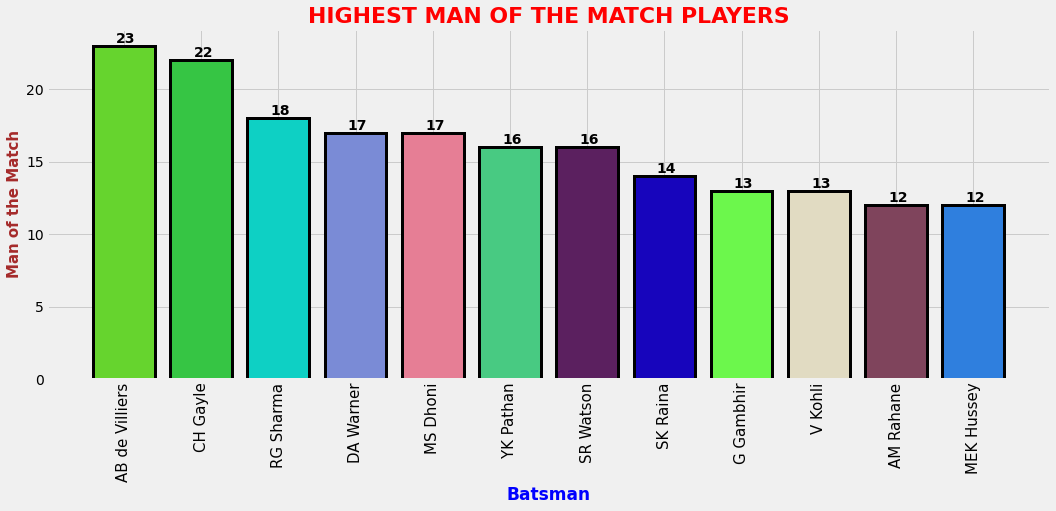

In [ ]:
most_mom = matches_2020['player_of_match'].value_counts().to_frame()
most_mom = most_mom[most_mom.player_of_match.values > 11]
print(most_mom)

def random_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color

plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,6))
image = plt.bar(most_mom.index, height = most_mom.player_of_match.values, color = random_colors(len(most_mom.player_of_match.values)), edgecolor = 'black', linewidth=3, capstyle='butt')
plt.xticks(rotation= 90 , fontsize = 15 )
plt.title('HIGHEST MAN OF THE MATCH PLAYERS', fontsize = 22, fontweight='bold' ,color = 'red')
plt.xlabel('Batsman' , fontsize = 17, fontweight='bold', color = 'blue')
plt.ylabel('Man of the Match',fontsize= 15 , fontweight='bold', color = 'brown')

for index,data in enumerate(most_mom.player_of_match.values):
    plt.text(x=index-0.1 , y =data+0.2, s=f"{data}", fontweight='bold')

plt.tight_layout

image

## ***Run distribution of any specific player in IPL***

enter_batsman_name  or else V Kohli deatils will be shown by default:  
      batsman  run_distribution  count_of_run_dist  runs_scored
1824  V Kohli                 1               1919         1919
1825  V Kohli                 2                346          692
1826  V Kohli                 3                 13           39
1827  V Kohli                 4                504         2016
1828  V Kohli                 6                202         1212


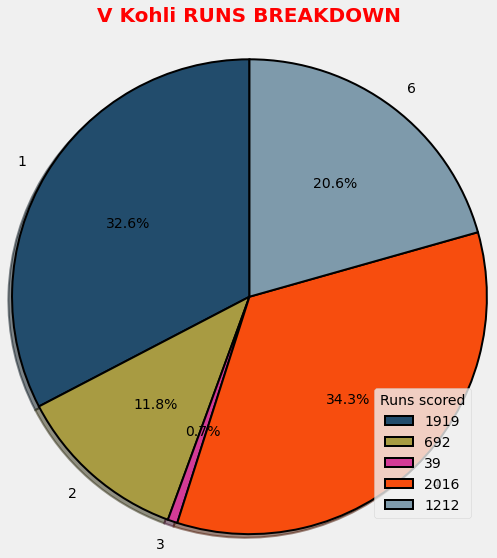

In [ ]:
BATSMAN_NAME = input('enter_batsman_name  or else V Kohli deatils will be shown by default:  ' ) or 'V Kohli'
run_breakup_of_batsman = ball_data_2020[ball_data_2020['batsman_runs'] != 0]
run_breakup_of_batsman = run_breakup_of_batsman.groupby(by = ['batsman','batsman_runs'], as_index=False).size()
run_breakup_of_batsman.columns = ['batsman', 'run_distribution', 'count_of_run_dist']
run_breakup_of_batsman['runs_scored'] = run_breakup_of_batsman['run_distribution'] * run_breakup_of_batsman['count_of_run_dist']

def run_breakup(BATSMAN_NAME):  
  run_breakup_of__specific_batsman = run_breakup_of_batsman[run_breakup_of_batsman['batsman'] == BATSMAN_NAME]
  return run_breakup_of__specific_batsman



batsman_distribution = run_breakup(BATSMAN_NAME)
plt.figure(figsize=(40,8))
plt.pie(batsman_distribution.runs_scored.values, labels=batsman_distribution.run_distribution.values, autopct='%1.1f%%',
        shadow=True, startangle=90,radius = 1.3,wedgeprops={"edgecolor":"black",'linewidth': 2,'antialiased': True},
        colors=random_colors(len(batsman_distribution.run_distribution.values))
        );
plt.legend(batsman_distribution.runs_scored.values,loc='lower right',title='Runs scored')
plt.title(f"{BATSMAN_NAME} RUNS BREAKDOWN", fontsize = 20, fontweight='bold' ,color = 'red', y=1.09)
plt.tight_layout()
#print(colours_in_pie)

print(run_breakup_of_batsman[run_breakup_of_batsman['batsman'] == BATSMAN_NAME])

# <font color='green'>**PLAYERS WHO  DEAL WITH BOUNDARIES MOSTLY**</h1></font>

## ***Team who have scored most run via boundaries(4's & 6's) in IPL***

In [ ]:
boundaries_4s_6s = ball_data_2020[((ball_data_2020['batsman_runs'] == 6) | (ball_data_2020['batsman_runs'] == 4)) & (ball_data_2020['non_boundary'] != 1)]
boundaries_4s_6s_team = boundaries_4s_6s.groupby(by=['batting_team'])['total_runs'].sum().sort_values(ascending = False).to_frame().reset_index()
boundaries_4s_6s_team

,batting_team,total_runs
0,Mumbai Indians,18601
1,Royal Challengers Bangalore,17318
2,Kings XI Punjab,16935
3,Kolkata Knight Riders,16584
4,Delhi Daredevils/Capitals,16372
5,Chennai Super Kings,15809
6,Rajasthan Royals,13511
7,Sunrisers Hyderabad,10269
8,Deccan Chargers,6239
9,Pune Warriors,3283


## ***Total number of boundaries and runs scored by each individual in IPL***

In [ ]:
boundaries_4s_6s_batsman = boundaries_4s_6s.groupby('batsman').size().sort_values(ascending = False).reset_index()
boundaries_4s_6s_batsman.columns = ['batsman', 'no_of_boundaries']
boundaries_4s_6s_batsman.head(10)

,batsman,no_of_boundaries
0,CH Gayle,732
1,DA Warner,705
2,V Kohli,704
3,S Dhawan,699
4,SK Raina,687
5,RG Sharma,671
6,AB de Villiers,625
7,RV Uthappa,617
8,SR Watson,566
9,G Gambhir,551


### ***chris gayle is leading the chart with most number of boundaries , he is a legend in IPL :)***

In [ ]:
boundaries_batsman_runs = boundaries_4s_6s.groupby('batsman', as_index = False).batsman_runs.sum()
boundaries_batsman_runs = boundaries_batsman_runs.sort_values('batsman_runs',ascending = False)
boundaries_batsman_runs.columns = ['batsman', 'boundry_runs']
boundaries_batsman_runs

,batsman,boundry_runs
81,CH Gayle,3626
415,V Kohli,3218
95,DA Warner,3210
361,SK Raina,3136
317,RG Sharma,3110
...,...,...
112,DNT Zoysa,4
14,AA Noffke,4
392,Shivam Sharma,4
330,RS Sodhi,4


## ***Players who have scored more than 300 runs and have scored most boundaries in IPL***

           batsman  boundry_runs  batsman_runs  boundary_percentage
63       SP Narine           724           892                81.17
37      AD Russell          1194          1517                78.71
0         CH Gayle          3626          4772                75.98
75   ST Jayasuriya           570           768                74.22
25    AC Gilchrist          1508          2069                72.89
16        V Sehwag          1972          2728                72.29
122         MM Ali           222           309                71.84
97     PC Valthaty           360           505                71.29
21        DR Smith          1682          2385                70.52
96        N Pooran           366           521                70.25


<BarContainer object of 10 artists>

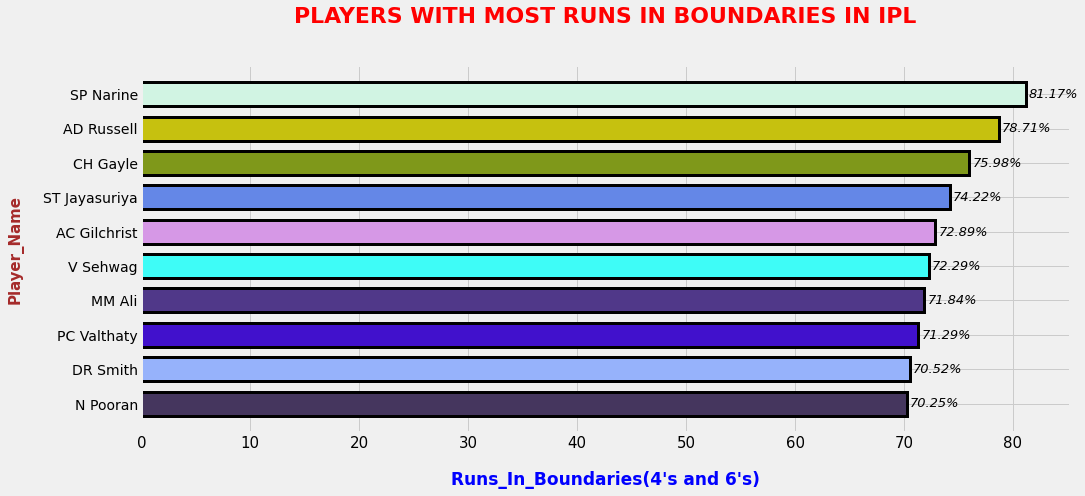

In [ ]:
batsman_total_runs = ball_data_2020.groupby('batsman', as_index= False).batsman_runs.sum().sort_values('batsman_runs',ascending = False)
batsman_total_runs

boundaries_percentage_by_batsman = pd.merge(boundaries_batsman_runs, batsman_total_runs, on='batsman')
boundaries_percentage_by_batsman['boundary_percentage'] = round((boundaries_percentage_by_batsman['boundry_runs']/boundaries_percentage_by_batsman['batsman_runs']) * 100,2)
boundaries_percentage_by_batsman = boundaries_percentage_by_batsman[boundaries_percentage_by_batsman['batsman_runs'] > 300]
boundaries_percentage_by_batsman = boundaries_percentage_by_batsman.sort_values('boundary_percentage', ascending = False)
print(boundaries_percentage_by_batsman.head(10))


boundaries_percentage_by_batsman = boundaries_percentage_by_batsman.sort_values(by='boundary_percentage')
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
best_hitter = plt.barh(boundaries_percentage_by_batsman.tail(10).batsman,
                       width=boundaries_percentage_by_batsman.tail(10).boundary_percentage.values ,
                       color = random_colors(len(most_mom.player_of_match.values)),
                       edgecolor = 'black',
                       linewidth=3,
                       capstyle='butt',
                       height=0.7
                       )
plt.xticks(fontsize = 15 )
plt.title('PLAYERS WITH MOST RUNS IN BOUNDARIES IN IPL', fontsize = 22, fontweight='bold' ,color = 'red', y = 1.1)
plt.xlabel(r"Runs_In_Boundaries(4's and 6's)" , fontsize = 17, fontweight='bold', color = 'blue',labelpad=20)
plt.ylabel('Player_Name',fontsize= 15 , fontweight='bold', color = 'brown', labelpad=20)

for index,data in enumerate(boundaries_percentage_by_batsman.boundary_percentage.tail(10).values):
    plt.text(x=data+0.3 , y =index -0.1, s=f"{data}%", fontweight='ultralight', fontsize = 13, fontstyle='italic')

plt.tight_layout(pad=3.0)

best_hitter


# <font color='green'>**FIRST BATTING AND SECOND BATTING STAT**</h1></font>

## ***Batfirst and batsecond second deatils***

In [ ]:
def check_batfirst(row): 
  team_list = [row['team1'], row['team2']] 
  if row['toss_decision'] == 'bat':
     row['batfirst_team'] = row['toss_winner']
     return row['batfirst_team']
  elif row['toss_decision'] == 'field':
     team_list.remove(row['toss_winner'] )
     return team_list[0]

def check_batsecond(row):
  team_list = [row['team1'], row['team2']]
  if row['toss_decision'] == 'bat':
     team_list.remove(row['toss_winner'] )
     return team_list[0]
  elif row['toss_decision'] == 'field':
     row['batsecond_team'] = row['toss_winner']
     return row['batsecond_team']

bat_first_second = matches_2020[~matches_2020['toss_winner'].isnull()]
bat_first_second['batfirst_team'] = bat_first_second.apply(check_batfirst, axis=1)
bat_first_second['batsecond_team'] = bat_first_second.apply(check_batsecond, axis=1)

bat_first_second.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,batfirst_team,batsecond_team
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,Kolkata Knight Riders,Royal Challengers Bangalore
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,Chennai Super Kings,Kings XI Punjab
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils/Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils/Capitals,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,Rajasthan Royals,Delhi Daredevils/Capitals
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,Mumbai Indians,Royal Challengers Bangalore
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,Deccan Chargers,Kolkata Knight Riders


## ***Most wins by a team battting first in IPL***

                          Team  defend_won  batfirst_count  defending_winning%
0          Chennai Super Kings          55              93               59.14
3             Rajasthan Royals          37              71               52.11
1               Mumbai Indians          50             110               45.45
2        Kolkata Knight Riders          38              93               40.86
4    Delhi Daredevils/Capitals          34              89               38.20
7          Sunrisers Hyderabad          23              69               33.33
5  Royal Challengers Bangalore          31              95               32.63
6              Kings XI Punjab          24              97               24.74


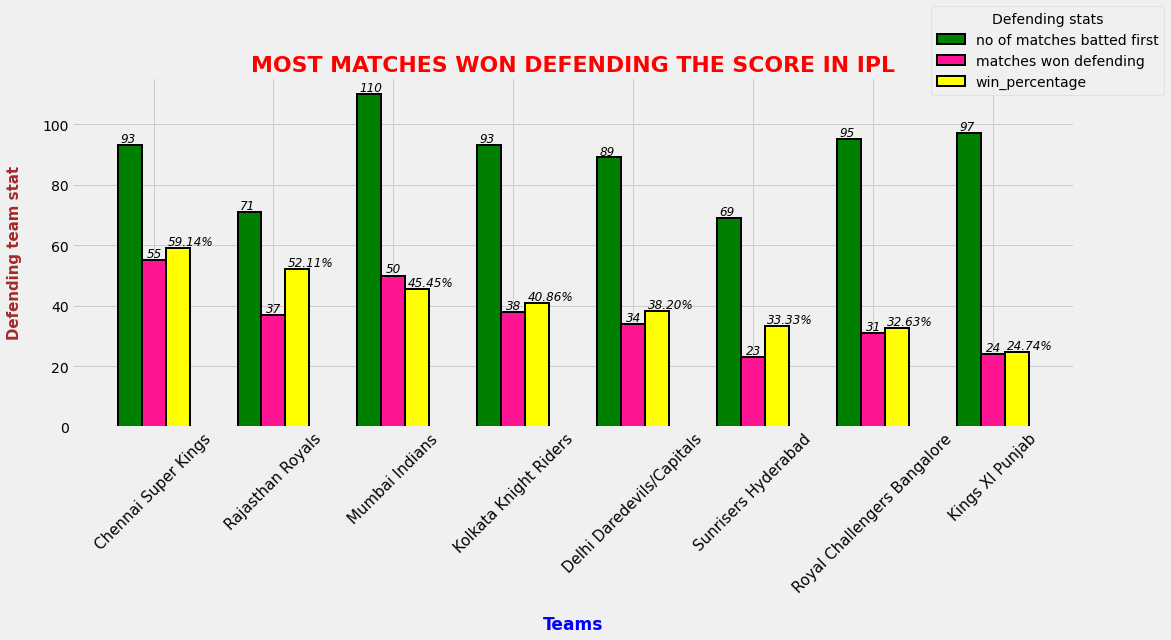

In [ ]:
best_defenders = bat_first_second[bat_first_second['toss_winner'] == bat_first_second['batfirst_team'] ]
best_defenders = best_defenders['winner'].value_counts().reset_index()
best_defenders.columns = ['Team', 'defend_won']
best_defenders


batfirst_team = bat_first_second['batfirst_team'].value_counts().reset_index()

batfirst_team.columns= ['Team','batfirst_count']
batfirst_team
best_defenders_ipl = best_defenders.merge(batfirst_team, on='Team')
best_defenders_ipl['defending_winning%'] = round(best_defenders_ipl['defend_won']/best_defenders_ipl['batfirst_count']* 100,2)
best_defenders_ipl = best_defenders_ipl[best_defenders_ipl['batfirst_count'] > 43].sort_values('defending_winning%',ascending=False)
print(best_defenders_ipl)


x = np.arange(len(best_defenders_ipl))

width = 0.2

plt.figure(figsize=(16,6))
plt.bar(x-0.2, best_defenders_ipl['batfirst_count'], width, color='green', label ='no of matches batted first',  edgecolor = 'black',linewidth=2)
plt.bar(x, best_defenders_ipl['defend_won'], width, color='#FF1493', label='matches won defending', edgecolor = 'black',linewidth=2)
plt.bar(x+0.2, best_defenders_ipl['defending_winning%'], width, color='yellow', label = 'win_percentage',  edgecolor = 'black',linewidth=2)

plt.title('MOST MATCHES WON DEFENDING THE SCORE IN IPL', fontsize = 22, fontweight='bold' ,color = 'red')
plt.xlabel('Teams' , fontsize =17, fontweight='bold', color = 'blue', labelpad= 20)
plt.xticks(x,best_defenders_ipl['Team'], rotation = 45, fontsize =15)
plt.ylabel('Defending team stat',fontsize= 15 , fontweight='bold', color = 'brown', labelpad = 20)

plt.legend(bbox_to_anchor =(0.85, 0.93), ncol = 1, title = 'Defending stats')

for index,data in enumerate(best_defenders_ipl['defending_winning%'].values):
    plt.text(x=index+0.12 , y =data + 1, s=   f"{'%.2f'%(data)}%", fontweight='ultralight', fontstyle='italic', fontsize = 12)

for index,data in enumerate(best_defenders_ipl['defend_won']):
    plt.text(x=index-0.06 , y =data+1, s= data, fontweight='ultralight', fontstyle='italic', fontsize = 12)

for index,data in enumerate(best_defenders_ipl['batfirst_count']):
    plt.text(x=index - 0.28 , y =data+0.9, s= data, fontweight='ultralight', fontstyle='italic', fontsize = 12)

## ***Most wins by a team battting second in IPL***

                          Team  Chase_won  batsecond_count  chasing_winning%
7          Sunrisers Hyderabad         43               55             78.18
0               Mumbai Indians         70               93             75.27
1              Kings XI Punjab         64               93             68.82
2        Kolkata Knight Riders         61               99             61.62
3  Royal Challengers Bangalore         60              100             60.00
5          Chennai Super Kings         51               85             60.00
4    Delhi Daredevils/Capitals         52              105             49.52
6             Rajasthan Royals         44               90             48.89


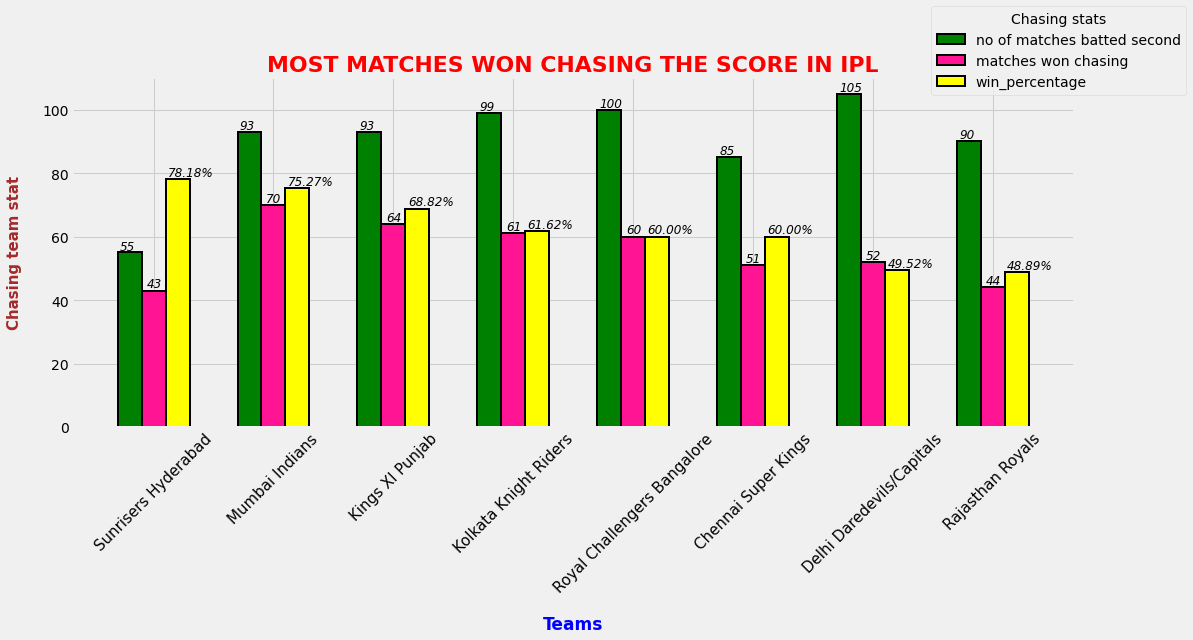

In [ ]:
best_chasers = bat_first_second[bat_first_second['toss_winner'] == bat_first_second['batsecond_team'] ]
best_chasers = best_chasers['winner'].value_counts().reset_index()
best_chasers.columns = ['Team', 'Chase_won']
best_chasers

batsecond_team = bat_first_second['batsecond_team'].value_counts().reset_index()

batsecond_team.columns= ['Team','batsecond_count']
batsecond_team
best_chasing_ipl = best_chasers.merge(batsecond_team, on='Team')                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
best_chasing_ipl['chasing_winning%'] = round(best_chasing_ipl['Chase_won']/best_chasing_ipl['batsecond_count']* 100,2)
best_chasing_ipl = best_chasing_ipl[best_chasing_ipl['batsecond_count'] > 43].sort_values('chasing_winning%',ascending=False)
print(best_chasing_ipl)


x = np.arange(len(best_chasing_ipl))

width = 0.2

plt.figure(figsize=(16,6))
plt.bar(x-0.2, best_chasing_ipl['batsecond_count'], width, color='green', label ='no of matches batted second',  edgecolor = 'black',linewidth=2)
plt.bar(x, best_chasing_ipl['Chase_won'], width, color='#FF1493', label='matches won chasing', edgecolor = 'black',linewidth=2)
plt.bar(x+0.2, best_chasing_ipl['chasing_winning%'], width, color='yellow', label = 'win_percentage',  edgecolor = 'black',linewidth=2)

plt.title('MOST MATCHES WON CHASING THE SCORE IN IPL', fontsize = 22, fontweight='bold' ,color = 'red')
plt.xlabel('Teams' , fontsize =17, fontweight='bold', color = 'blue', labelpad= 20)
plt.xticks(x,best_chasing_ipl['Team'], rotation = 45, fontsize =15)
plt.ylabel('Chasing team stat',fontsize= 15 , fontweight='bold', color = 'brown', labelpad = 20)

plt.legend(bbox_to_anchor =(0.85, 0.93), ncol = 1, title = 'Chasing stats')

for index,data in enumerate(best_chasing_ipl['chasing_winning%'].values):
    plt.text(x=index+0.12 , y =data + 1, s=   f"{'%.2f'%(data)}%", fontweight='ultralight', fontstyle='italic', fontsize = 12)

for index,data in enumerate(best_chasing_ipl['Chase_won']):
    plt.text(x=index-0.06 , y =data+1, s= data, fontweight='ultralight', fontstyle='italic', fontsize = 12)

for index,data in enumerate(best_chasing_ipl['batsecond_count']):
    plt.text(x=index - 0.28 , y =data+0.9, s= data, fontweight='ultralight', fontstyle='italic', fontsize = 12)

# <font color='green'>**BEST LOWEST SCORE DEFENDERS AND HIGH RUN CHASERS**</h1></font>

In [ ]:
team_score_inning1 = ball_data_2020[ball_data_2020['inning'] == 1].groupby(['id','inning'], as_index=False)['total_runs'].sum()

team_score_inning1.rename(columns={'total_runs':'inning1_score'}, inplace=True)
team_score_inning1 = team_score_inning1[['id','inning1_score']]
team_score_inning1
team_score_inning2 = ball_data_2020[(ball_data_2020['inning'] == 2)].groupby(['id','inning'], as_index=False)['total_runs'].sum()

team_score_inning2.rename(columns={'total_runs':'inning2_score'}, inplace=True)

team_score_inning2
team_score_data = matches_2020.copy()
team_score_data = team_score_data[~team_score_data['result'].isnull()]
team_score_data = pd.merge(team_score_data,team_score_inning1, on='id' )
team_score_data = pd.merge(team_score_data,team_score_inning2[['id','inning2_score']], on='id' )
team_score_data = team_score_data.sort_values('date')



best_team_defending = team_score_data[team_score_data['inning1_score'] < 150]
best_team_defending = best_team_defending[(best_team_defending['inning1_score'] >= best_team_defending['inning2_score']) & (best_team_defending['result'] != 'wickets')]

best_team_defending = best_team_defending[~((best_team_defending['toss_decision'] == 'bat') & (best_team_defending['winner'] != best_team_defending['toss_winner']))]
best_team_defending = best_team_defending[~((best_team_defending['toss_decision'] == 'field') & (best_team_defending['winner'] == best_team_defending['toss_winner']))]

 


all_score_data = team_score_data.merge(bat_first_second[['id','batfirst_team','batsecond_team']], on='id')
all_score_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,inning1_score,inning2_score,batfirst_team,batsecond_team
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,222,82,Kolkata Knight Riders,Royal Challengers Bangalore
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,240,207,Chennai Super Kings,Kings XI Punjab
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils/Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils/Capitals,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,129,132,Rajasthan Royals,Delhi Daredevils/Capitals
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,165,166,Mumbai Indians,Royal Challengers Bangalore
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,110,112,Deccan Chargers,Kolkata Knight Riders


## ***Best team to defend low score***

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


                          Team  < 150 score  < 150 scores_wins  win_percent
0          Sunrisers Hyderabad           22                  8        36.36
1              Kings XI Punjab           33                 10        30.30
2               Mumbai Indians           30                  9        30.00
3          Chennai Super Kings           27                  7        25.93
4        Kolkata Knight Riders           30                  6        20.00
5  Royal Challengers Bangalore           26                  4        15.38
6             Rajasthan Royals           28                  2         7.14


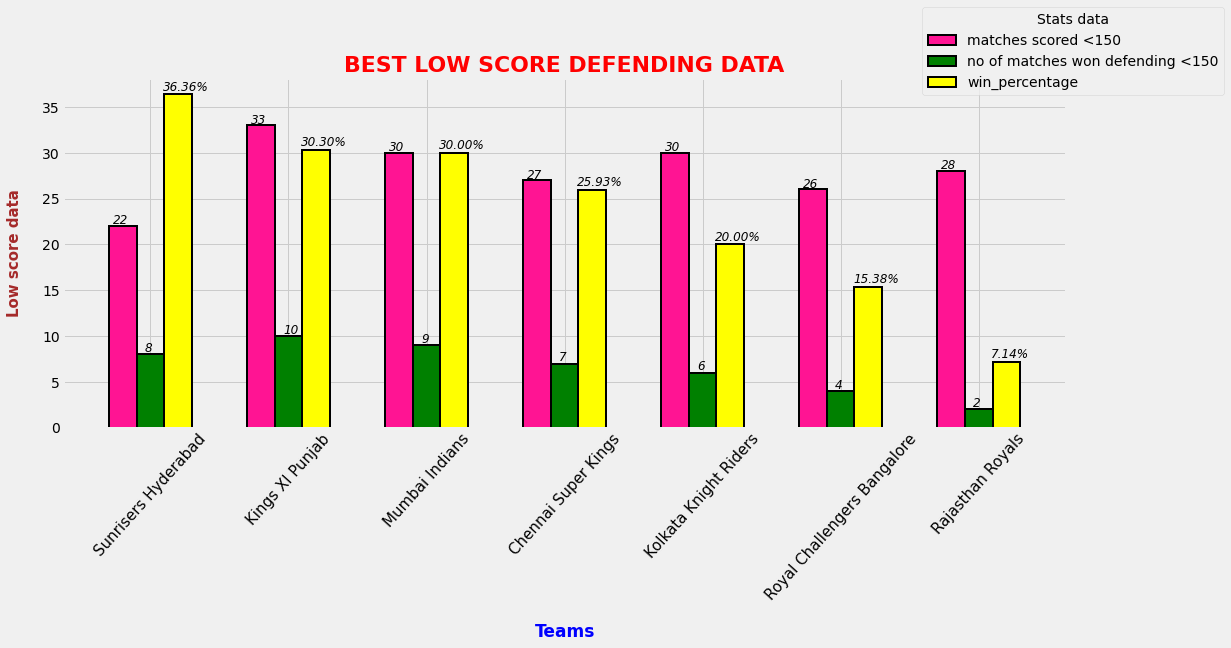

In [ ]:


df_less_score = all_score_data[all_score_data['inning1_score'] < 150]
df_count = df_less_score.groupby('batfirst_team', as_index=False).size()
df_count.columns = ['Team', 'score < 150']

df_less_score_wins = df_less_score[((all_score_data['winner']) == (all_score_data['batfirst_team']))]#.value_counts()
df_less_score.head()


low_score_counts = df_less_score['batfirst_team'].value_counts().reset_index()
low_score_counts.columns = ['Team', '< 150 score']
matches_won_defending_low_total = df_less_score_wins['winner'].value_counts().reset_index()
matches_won_defending_low_total.columns = ['Team', '< 150 scores_wins']
low_score_win_percentage = low_score_counts.merge(matches_won_defending_low_total, on='Team')
low_score_win_percentage['win_percent'] = round(low_score_win_percentage['< 150 scores_wins']/low_score_win_percentage['< 150 score']*100,2)
low_score_win_percentage = low_score_win_percentage[low_score_win_percentage['< 150 score'] > 19]
low_score_win_percentage = low_score_win_percentage.sort_values('win_percent', ascending =False).reset_index(drop=True)
print(low_score_win_percentage)


x = np.arange(len(low_score_win_percentage))

width = 0.2

plt.figure(figsize=(16,6))
plt.bar(x-0.2, low_score_win_percentage['< 150 score'], width, color='#FF1493', label='matches scored <150', edgecolor = 'black',linewidth=2)
plt.bar(x, low_score_win_percentage['< 150 scores_wins'], width, color='green', label ='no of matches won defending <150',  edgecolor = 'black',linewidth=2)
plt.bar(x+0.2, low_score_win_percentage['win_percent'], width, color='yellow', label = 'win_percentage',  edgecolor = 'black',linewidth=2)

plt.title('BEST LOW SCORE DEFENDING DATA', fontsize = 22, fontweight='bold' ,color = 'red')
plt.xlabel('Teams' , fontsize = 17, fontweight='bold', color = 'blue', labelpad= 20)
plt.xticks(x,low_score_win_percentage['Team'], rotation = 48, fontsize =15)
plt.ylabel('Low score data',fontsize= 15 , fontweight='bold', color = 'brown', labelpad = 20)

plt.legend(bbox_to_anchor =(0.85, 0.93), ncol = 1, title = 'Stats data')

for index,data in enumerate(low_score_win_percentage['win_percent'].values):
    plt.text(x=index+0.09 , y =data + 0.45, s=   f"{'%.2f'%(data)}%", fontweight='ultralight', fontstyle='italic', fontsize = 12)

for index,data in enumerate(low_score_win_percentage['< 150 score']):
    plt.text(x=index-0.27 , y =data+0.2, s= data, fontweight='ultralight', fontstyle='italic', fontsize = 12)

for index,data in enumerate(low_score_win_percentage['< 150 scores_wins']):
    plt.text(x=index-0.04 , y =data+0.3, s= data, fontweight='ultralight', fontstyle='italic', fontsize = 12)

## ***A very interseting fact on delhi is that they never won defending a score <150*** 

In [ ]:
print(len(df_less_score[(df_less_score['batfirst_team'] == 'Delhi Daredevils/Capitals')]))

print(len(df_less_score[(df_less_score['batfirst_team'] == 'Delhi Daredevils/Capitals') & (df_less_score['winner'] == 'Delhi Daredevils/Capitals')]))

25
0


## ***Best team to chase high scores***

                          Team  > 190 score  > 190 scores_wins  win_percent
0    Delhi Daredevils/Capitals            8                  6        75.00
1              Kings XI Punjab           11                  8        72.73
2             Rajasthan Royals            8                  5        62.50
3        Kolkata Knight Riders            5                  3        60.00
4          Chennai Super Kings            8                  4        50.00
5  Royal Challengers Bangalore            5                  2        40.00
6               Mumbai Indians            8                  3        37.50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


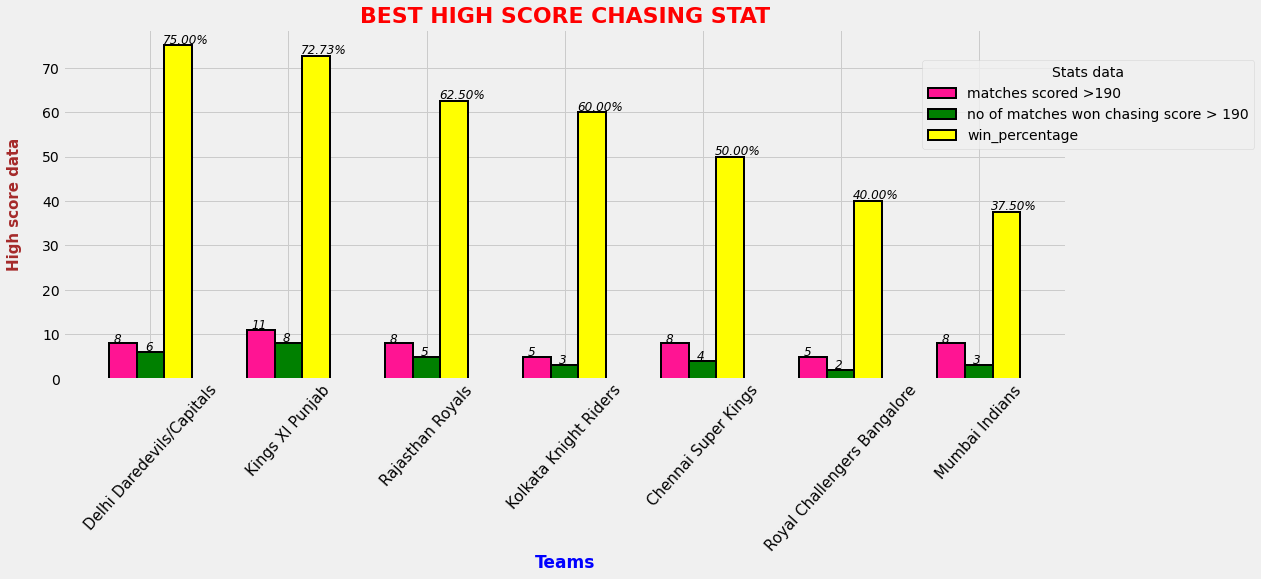

In [ ]:
best_team_chasing = team_score_data[team_score_data['inning2_score'] > 190]
best_team_chasing_wins = best_team_chasing[best_team_chasing['inning2_score'] >= best_team_chasing['inning1_score']]
best_team_chasing_wins = best_team_chasing_wins[~((best_team_chasing_wins['toss_decision'] == 'field') & (best_team_chasing_wins['toss_winner'] != best_team_chasing_wins['winner']))]
best_team_chasing.head()

best_team_chasing['winner'].value_counts()

df_high_score = all_score_data[all_score_data['inning2_score'] > 190]
df_high_score.head()

df_high_score_wins = df_high_score[((all_score_data['winner']) == (all_score_data['batsecond_team']))]
df_high_score_wins.head()

high_score_counts = df_high_score['batsecond_team'].value_counts().reset_index()
high_score_counts.columns = ['Team', '> 190 score']
matches_won_chasing_high_total = df_high_score_wins['winner'].value_counts().reset_index()
matches_won_chasing_high_total.columns = ['Team', '> 190 scores_wins']
high_score_win_percentage = high_score_counts.merge(matches_won_chasing_high_total, on='Team')
high_score_win_percentage['win_percent'] = round(high_score_win_percentage['> 190 scores_wins']/high_score_win_percentage['> 190 score']*100,2)
high_score_win_percentage = high_score_win_percentage[high_score_win_percentage['> 190 score'] > 3]
high_score_win_percentage = high_score_win_percentage.sort_values('win_percent', ascending =False).reset_index(drop=True)
print(high_score_win_percentage)


x = np.arange(len(high_score_win_percentage))

width = 0.2

plt.figure(figsize=(16,6))
plt.bar(x-0.2, high_score_win_percentage['> 190 score'], width, color='#FF1493', label='matches scored >190', edgecolor = 'black',linewidth=2)
plt.bar(x, high_score_win_percentage['> 190 scores_wins'], width, color='green', label ='no of matches won chasing score > 190',  edgecolor = 'black',linewidth=2)
plt.bar(x+0.2, high_score_win_percentage['win_percent'], width, color='yellow', label = 'win_percentage',  edgecolor = 'black',linewidth=2)

plt.title('BEST HIGH SCORE CHASING STAT', fontsize = 22, fontweight='bold' ,color = 'red')
plt.xlabel('Teams' , fontsize = 17, fontweight='bold', color = 'blue', labelpad= 0)
plt.xticks(x,high_score_win_percentage['Team'], rotation = 48, fontsize =15)
plt.ylabel('High score data',fontsize= 15 , fontweight='bold', color = 'brown', labelpad = 20)

plt.legend(bbox_to_anchor =(0.85, 0.93), ncol = 1, title = 'Stats data')

for index,data in enumerate(high_score_win_percentage['win_percent'].values):
    plt.text(x=index+0.09 , y =data + 0.45, s=   f"{'%.2f'%(data)}%", fontweight='ultralight', fontstyle='italic', fontsize = 12)

for index,data in enumerate(high_score_win_percentage['> 190 score']):
    plt.text(x=index-0.27 , y =data+0.2, s= data, fontweight='ultralight', fontstyle='italic', fontsize = 12)

for index,data in enumerate(high_score_win_percentage['> 190 scores_wins']):
    plt.text(x=index-0.04 , y =data+0.3, s= data, fontweight='ultralight', fontstyle='italic', fontsize = 12)

In [ ]:
#high_score_counts[high_score_counts['batsecond_team'] == 'Royal Challengers Bangalore']
#df_high_score[(df_high_score['batsecond_team'] == 'Delhi Daredevils/Capitals') & (df_high_score['inning2_score'] > 190)]

# <font color='green'>**TOSS WIN AND MATCH LOST MOST AND VICE VERSA**</h1></font>


## ***Toss stat in IPL***

In [ ]:
toss_won = matches_2020['toss_winner'].value_counts().reset_index()
toss_won.columns= ['Team','Toss_won']
toss_won

,Team,Toss_won
0,Mumbai Indians,106
1,Delhi Daredevils/Capitals,100
2,Kolkata Knight Riders,98
3,Chennai Super Kings,97
4,Rajasthan Royals,87
5,Royal Challengers Bangalore,87
6,Kings XI Punjab,85
7,Sunrisers Hyderabad,57
8,Deccan Chargers,43
9,Pune Warriors,20


## ***Very unlucky with the toss***

                          Team  ...  loss_percent
0  Royal Challengers Bangalore  ...         55.38
1              Kings XI Punjab  ...         55.26
2          Sunrisers Hyderabad  ...         54.03
3        Kolkata Knight Riders  ...         48.96
4    Delhi Daredevils/Capitals  ...         48.45

[5 rows x 4 columns]




<BarContainer object of 8 artists>

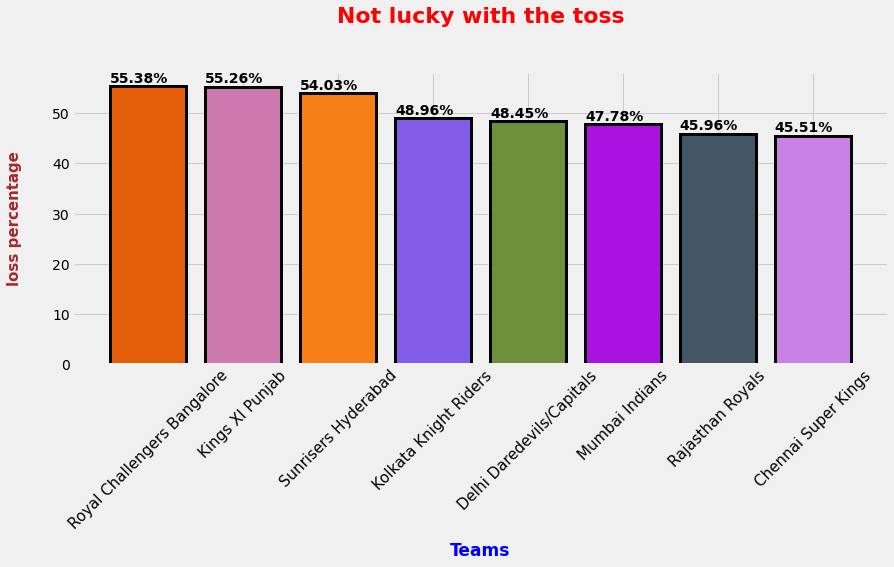

In [ ]:
finding_lost_toss_times = matches_2020.copy()

def toss_losser_finder(row):
  list1 = [row['team1'], row['team2']]
           
  list1.remove(row['toss_winner'])
  return list1[0]


finding_lost_toss_times['toss_losser'] = finding_lost_toss_times.apply(toss_losser_finder, axis=1)
toss_lost_times = finding_lost_toss_times['toss_losser'].value_counts().reset_index()
toss_lost_times.columns = ['Team', 'No_of_times_toss_lost']
toss_lost_times

toss_lost_percentage = matches_played.merge(toss_lost_times, on ='Team')
toss_lost_percentage['loss_percent'] = round(toss_lost_percentage['No_of_times_toss_lost']/toss_lost_percentage['No_of_matches_played']*100,2)
toss_lost_percentage = toss_lost_percentage[toss_lost_percentage['No_of_matches_played'] > 75]
toss_lost_percentage = toss_lost_percentage.sort_values('loss_percent', ascending =False).reset_index(drop=True)

print(toss_lost_percentage.head())
print()
print()


plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,5))
toss_lost_most = plt.bar(toss_lost_percentage.Team, height = toss_lost_percentage.loss_percent.values, color = random_colors(len(most_mom.player_of_match.values)), edgecolor = 'black', linewidth=3, capstyle='butt')
plt.xticks(rotation= 45 , fontsize = 15)
plt.title('Not lucky with the toss', fontsize = 22, fontweight='bold' ,color = 'red', y=1.15)
plt.xlabel('Teams' , fontsize = 17, fontweight='bold', color = 'blue', labelpad = 10)
plt.ylabel('loss percentage',fontsize= 15 , fontweight='bold', color = 'brown',labelpad = 30)

for index,data in enumerate(toss_lost_percentage.loss_percent.values):
    plt.text(x=index-0.4 , y =data+0.8, s=f"{data}%", fontweight='bold')

plt.tight_layout

toss_lost_most

## ***Seize the opprtunity with the toss***

                    Team  Toss_won  Matches_won  win_percent  loss_percent
3    Chennai Super Kings        97           61        62.89         37.11
0         Mumbai Indians       106           61        57.55         42.45
2  Kolkata Knight Riders        98           55        56.12         43.88
7    Sunrisers Hyderabad        57           29        50.88         49.12
4       Rajasthan Royals        87           44        50.57         49.43




<BarContainer object of 9 artists>

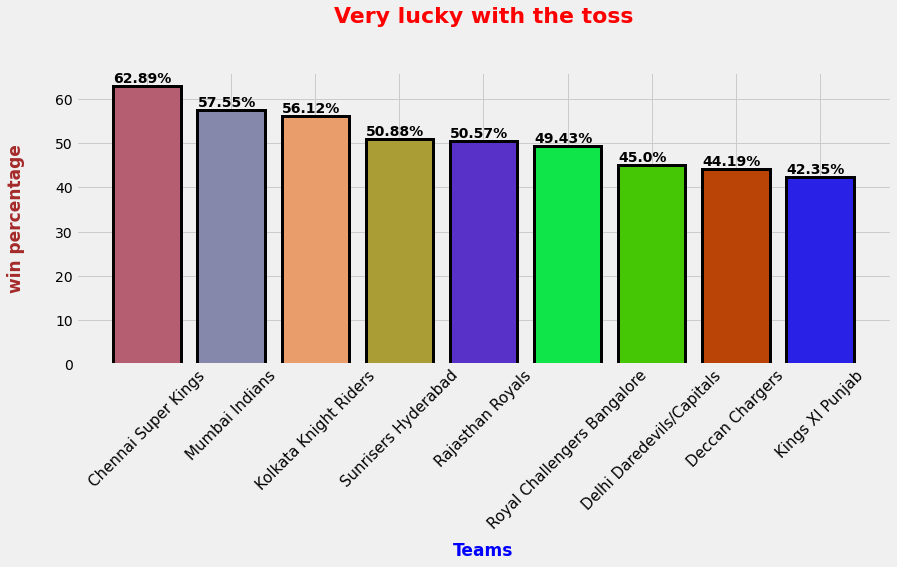

In [ ]:
toss_winner_and_match_winner = matches_2020[matches_2020['toss_winner'] == matches_2020['winner']]
toss_winner_and_match_winner = toss_winner_and_match_winner.groupby('toss_winner', as_index=False).size()
toss_winner_and_match_winner.columns = ['Team','Matches_won']
toss_winner_and_match_winner = toss_winner_and_match_winner.sort_values('Matches_won', ascending = False)
toss_winner_and_match_winner = pd.merge(toss_won,toss_winner_and_match_winner,on='Team')
toss_winner_and_match_winner['win_percent'] = round(toss_winner_and_match_winner['Matches_won']/toss_winner_and_match_winner['Toss_won']*100,2)
toss_winner_and_match_winner['loss_percent'] = 100 - toss_winner_and_match_winner['win_percent']
toss_winner_and_match_winner = toss_winner_and_match_winner.sort_values('win_percent', ascending = False)
toss_winner_and_match_winner = toss_winner_and_match_winner[toss_winner_and_match_winner['Toss_won'] > 20]


print(toss_winner_and_match_winner.head())
print()
print()


plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,5))
toss_won_most = plt.bar(toss_winner_and_match_winner.Team, height = toss_winner_and_match_winner.win_percent.values, color = random_colors(len(most_mom.player_of_match.values)), edgecolor = 'black', linewidth=3, capstyle='butt')
plt.xticks(rotation= 45 , fontsize = 15)
plt.title('Very lucky with the toss', fontsize = 22, fontweight='bold' ,color = 'red', y=1.15)
plt.xlabel('Teams' , fontsize = 17, fontweight='bold', color = 'blue', labelpad = 10)
plt.ylabel('win percentage',fontsize= 17 , fontweight='bold', color = 'brown',labelpad = 30)

for index,data in enumerate(toss_winner_and_match_winner.win_percent.values):
    plt.text(x=index-0.4 , y =data+0.8, s=f"{data}%", fontweight='bold')

plt.tight_layout

toss_won_most 


## ***Team that adapt to the conditions most***

                          Team  No_of_times_toss_lost  Matches_won  win_percent
2               Mumbai Indians                     97           59        60.82
5          Chennai Super Kings                     81           45        55.56
7          Sunrisers Hyderabad                     67           37        55.22
6             Rajasthan Royals                     74           37        50.00
1              Kings XI Punjab                    105           52        49.52
3        Kolkata Knight Riders                     94           44        46.81
0  Royal Challengers Bangalore                    108           48        44.44
4    Delhi Daredevils/Capitals                     94           41        43.62




<BarContainer object of 13 artists>

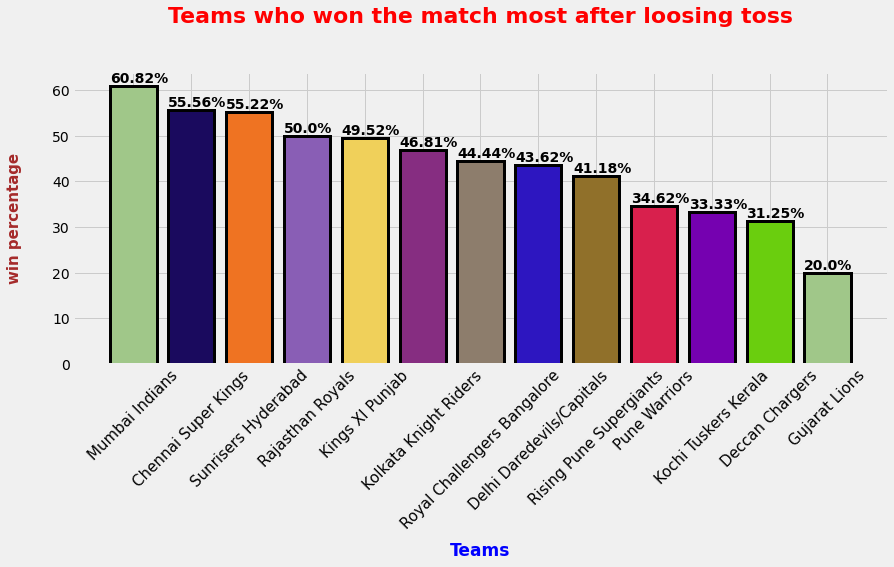

In [ ]:
toss_lost_and_match_won = finding_lost_toss_times[finding_lost_toss_times['toss_losser'] == finding_lost_toss_times['winner']]
toss_lost_and_match_won = toss_lost_and_match_won['winner'].value_counts().reset_index()
toss_lost_and_match_won.columns= ['Team', 'Matches_won']
toss_lost_and_match_won = pd.merge(toss_lost_times,toss_lost_and_match_won, on='Team')
toss_lost_and_match_won['win_percent'] = round(toss_lost_and_match_won['Matches_won']/toss_lost_and_match_won['No_of_times_toss_lost']*100,2)
toss_lost_and_match_won = toss_lost_and_match_won.sort_values('win_percent', ascending =False)
toss_lost_and_match_won

print(toss_lost_and_match_won.head(8))
print()
print()
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,5))
toss_independent = plt.bar(toss_lost_and_match_won.Team, height = toss_lost_and_match_won.win_percent.values, color = random_colors(len(most_mom.player_of_match.values)), edgecolor = 'black', linewidth=3, capstyle='butt')
plt.xticks(rotation= 45 , fontsize = 15)
plt.title('Teams who won the match most after loosing toss', fontsize = 22, fontweight='bold' ,color = 'red', y=1.15)
plt.xlabel('Teams' , fontsize = 17, fontweight='bold', color = 'blue', labelpad = 10)
plt.ylabel('win percentage',fontsize= 15 , fontweight='bold', color = 'brown',labelpad = 30)

for index,data in enumerate(toss_lost_and_match_won.win_percent.values):
    plt.text(x=index-0.4 , y =data+0.8, s=f"{data}%", fontweight='bold')

plt.tight_layout

toss_independent

## ***Bad descion makers based on toss***

                          Team  Match_lost_counts  Toss_won  loss_percent
1              Kings XI Punjab                 49        85         57.65
0    Delhi Daredevils/Capitals                 55       100         55.00
3  Royal Challengers Bangalore                 44        87         50.57
5             Rajasthan Royals                 43        87         49.43
7          Sunrisers Hyderabad                 28        57         49.12
4        Kolkata Knight Riders                 43        98         43.88
2               Mumbai Indians                 45       106         42.45
6          Chennai Super Kings                 36        97         37.11




<BarContainer object of 8 artists>

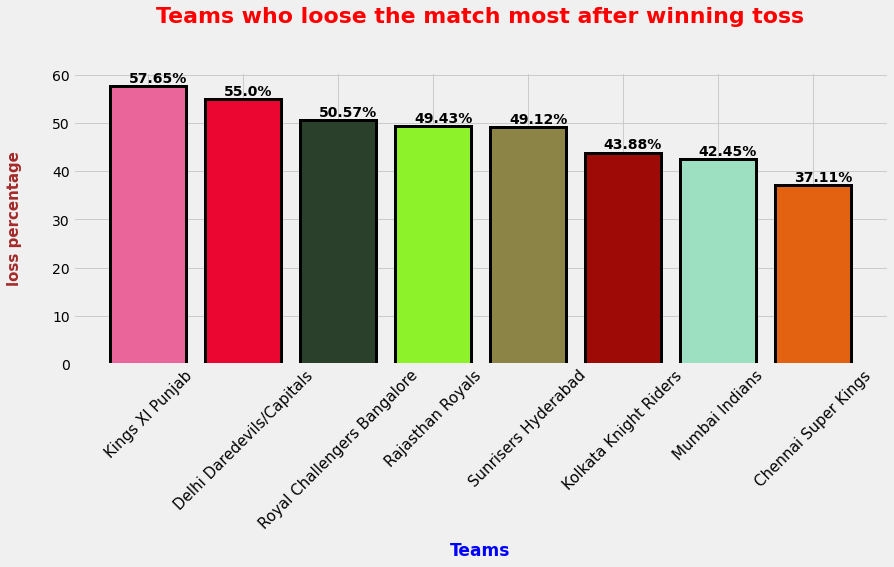

In [ ]:
toss_won_and_match_lost = matches_2020[matches_2020['toss_winner'] != matches_2020['winner']]
toss_won_and_match_lost = toss_won_and_match_lost['toss_winner'].value_counts().reset_index()
toss_won_and_match_lost.columns = ['Team','Match_lost_counts']
toss_won_and_match_lost = pd.merge(toss_won_and_match_lost,toss_won, on='Team')
toss_won_and_match_lost['loss_percent'] = round(toss_won_and_match_lost['Match_lost_counts']/toss_won_and_match_lost['Toss_won']*100,2)
toss_won_and_match_lost = toss_won_and_match_lost.sort_values('loss_percent',ascending = False)
toss_won_and_match_lost = toss_won_and_match_lost[toss_won_and_match_lost['Toss_won'] > 43]
print(toss_won_and_match_lost)
print()
print()
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,5))
bad_descision_makers = plt.bar(toss_won_and_match_lost.Team, height = toss_won_and_match_lost.loss_percent.values, color = random_colors(len(most_mom.player_of_match.values)), edgecolor = 'black', linewidth=3, capstyle='butt')
plt.xticks(rotation= 45 , fontsize = 15)
plt.title('Teams who loose the match most after winning toss', fontsize = 22, fontweight='bold' ,color = 'red', y=1.15)
plt.xlabel('Teams' , fontsize = 17, fontweight='bold', color = 'blue', labelpad = 10)
plt.ylabel('loss percentage',fontsize= 15 , fontweight='bold', color = 'brown',labelpad = 30)

for index,data in enumerate(toss_won_and_match_lost.loss_percent.values):
    plt.text(x=index-0.2 , y =data+0.8, s=f"{data}%", fontweight='bold')

plt.tight_layout

bad_descision_makers

# <font color='green'>**BEST ECONOMY RATES BOWLERS IN DEATH OVERS IN IPL  (LAST 5 OVERS DATA IN IPL)**</h1></font>

## ***Runs scored by each team in the last 5 overs of each match in IPL***

In [ ]:
inning1_teams = ball_data_2020[(ball_data_2020['inning'] == 1)]
inning2_teams = ball_data_2020[(ball_data_2020['inning'] == 2)]

In [ ]:
df1_1 = ball_data_2020[(ball_data_2020['inning'] == 1)].groupby(['id','over'], as_index=False).sum()[['id','over','total_runs']].groupby('id').tail(5).groupby('id',as_index=False)['total_runs'].sum()
df1_1 = pd.merge(df1_1,inning1_teams[['id','batting_team']],on='id').drop_duplicates()
df2_2 = df1_1.merge(team_score_data[['id','date']], on ='id' )
df2_2 = df2_2[['id','date','batting_team','total_runs']]
df2_2
df3 = ball_data_2020[(ball_data_2020['inning'] == 2)].groupby(['id','over'], as_index=False).sum()[['id','over','total_runs']].groupby('id').tail(5).groupby('id',as_index=False)['total_runs'].sum()
df4 = pd.merge(df3,inning2_teams[['id','batting_team']],on='id').drop_duplicates()
df4 = df4.merge(team_score_data[['id','date']], on ='id' )
df4 = df4[['id','date','batting_team','total_runs']]
df4
last5_overs_runs_scored = pd.concat([df2_2, df4]).sort_values('date').reset_index(drop=True)
last5_overs_runs_scored

,id,date,batting_team,total_runs
0,335982,2008-04-18,Kolkata Knight Riders,68
1,335982,2008-04-18,Royal Challengers Bangalore,26
2,335984,2008-04-19,Rajasthan Royals,33
3,335983,2008-04-19,Chennai Super Kings,79
4,335983,2008-04-19,Kings XI Punjab,42
...,...,...,...,...
1619,1237178,2020-11-06,Royal Challengers Bangalore,38
1620,1237180,2020-11-08,Sunrisers Hyderabad,43
1621,1237180,2020-11-08,Delhi Daredevils/Capitals,50
1622,1237181,2020-11-10,Delhi Daredevils/Capitals,38


## ***Runs given by each team in the last 5 overs of each match in IPL***

In [ ]:
df5 = inning1_teams.groupby(['id','over'], as_index=False).sum()[['id','over','total_runs']].groupby('id').tail(5).groupby('id',as_index=False)['total_runs'].sum()
df5 = pd.merge(df5,inning1_teams[['id','bowling_team']],on='id').drop_duplicates()
df5 = df5.merge(team_score_data[['id','date']], on ='id' )
df5 = df5[['id','date','bowling_team','total_runs']]
df6 = inning2_teams.groupby(['id','over'], as_index=False).sum()[['id','over','total_runs']].groupby('id').tail(5).groupby('id',as_index=False)['total_runs'].sum()
df6 = pd.merge(df6,inning2_teams[['id','bowling_team']],on='id').drop_duplicates()
df6 = df6.merge(team_score_data[['id','date']], on ='id' )
df6 = df6[['id','date','bowling_team','total_runs']]
last5_overs_runs_given = pd.concat([df5, df6]).sort_values('date').reset_index(drop=True)
last5_overs_runs_given

,id,date,bowling_team,total_runs
0,335982,2008-04-18,Royal Challengers Bangalore,68
1,335982,2008-04-18,Kolkata Knight Riders,26
2,335984,2008-04-19,Delhi Daredevils/Capitals,33
3,335983,2008-04-19,Kings XI Punjab,79
4,335983,2008-04-19,Chennai Super Kings,42
...,...,...,...,...
1619,1237178,2020-11-06,Sunrisers Hyderabad,38
1620,1237180,2020-11-08,Delhi Daredevils/Capitals,43
1621,1237180,2020-11-08,Sunrisers Hyderabad,50
1622,1237181,2020-11-10,Mumbai Indians,38


## ***Overall runs given in last 5 overs by a team in IPL***

*   ### ***Why RCB require a death bowling specialist***



In [ ]:
runs_last5 = last5_overs_runs_given.groupby('bowling_team',as_index=False)['total_runs'].sum()
runs_last5[runs_last5['total_runs'] > 2100].sort_values('total_runs', ascending = False)

,bowling_team,total_runs
11,Royal Challengers Bangalore,9408
4,Kings XI Punjab,9279
7,Mumbai Indians,9169
2,Delhi Daredevils/Capitals,8947
6,Kolkata Knight Riders,8867
0,Chennai Super Kings,8074
9,Rajasthan Royals,7557
12,Sunrisers Hyderabad,5667
1,Deccan Chargers,3776


## ***Average runs given in last 5 overs by a team in IPL***

In [ ]:
last5_overs_runs_given.groupby('bowling_team',as_index=False)['total_runs'].mean().sort_values('total_runs')

,bowling_team,total_runs
5,Kochi Tuskers Kerala,43.000000
7,Mumbai Indians,45.167488
0,Chennai Super Kings,45.359551
8,Pune Warriors,45.600000
12,Sunrisers Hyderabad,45.701613
6,Kolkata Knight Riders,46.182292
2,Delhi Daredevils/Capitals,46.598958
10,Rising Pune Supergiants,47.400000
9,Rajasthan Royals,47.528302
4,Kings XI Punjab,48.836842


## ***Average runs given by a Team in the overs 15-20 in IPL***

In [ ]:
last_5_over_data = pd.merge(bat_first_second[['id','batfirst_team','batsecond_team']],ball_data_2020, on = 'id')
last_5_over_data = last_5_over_data[last_5_over_data['inning'] == 1]
last_5_over_data.head()

filter1 = last_5_over_data[(last_5_over_data["over"]==19) & (last_5_over_data['ball'] == 6)]
list1 = filter1['id'].to_list()
#list1
last_5_over_data = last_5_over_data[last_5_over_data['id'].isin(list1)]
last_5_over_data= last_5_over_data[last_5_over_data['over'] > 14]

last_5_over_runs_team = last_5_over_data.groupby(['batsecond_team','id'], as_index=False).agg({'id':'nunique','total_runs':'sum'})
last_5_over_runs_team = last_5_over_runs_team.groupby('batsecond_team').agg({'id':'sum','total_runs':'sum'})
last_5_over_runs_team['avg_runs_last5'] = round(last_5_over_runs_team['total_runs']/last_5_over_runs_team['id'],2)
last_5_over_runs_team = last_5_over_runs_team[last_5_over_runs_team['id']>30]

last_5_over_runs_team.columns = ['matches_ball_first', 'runs_given_last5overs', 'avg_runs_last5_overs']
last_5_over_runs_team = last_5_over_runs_team.sort_values('avg_runs_last5_overs')
last_5_over_runs_team

,matches_ball_first,runs_given_last5overs,avg_runs_last5_overs
batsecond_team,,,
Sunrisers Hyderabad,52,2468,47.46
Kolkata Knight Riders,93,4554,48.97
Chennai Super Kings,81,4058,50.10
Mumbai Indians,84,4263,50.75
Rajasthan Royals,85,4423,52.04
Kings XI Punjab,85,4441,52.25
Delhi Daredevils/Capitals,100,5226,52.26
Royal Challengers Bangalore,87,4629,53.21


## ***Bowler's runs stat in the overs between 15-20***

In [ ]:
death_bowlers_runs_given = last_5_over_data[(last_5_over_data['extras_type'] != 'legbyes') & (last_5_over_data['extras_type'] != 'byes')]
death_bowlers_runs_calculate = death_bowlers_runs_given.groupby('bowler', as_index=False)['total_runs'].sum().sort_values('total_runs', ascending=False)
death_bowlers_runs_calculate


,bowler,total_runs
69,DJ Bravo,1097
295,UT Yadav,924
40,B Kumar,740
262,SL Malinga,739
268,SP Narine,730
...,...,...
237,S Badree,4
103,IS Sodhi,2
257,SE Rutherford,2
122,JM Kemp,1


## ***Best economic bowlers in the detath overs in history of IPL***

            over  total_runs   economy
bowler                                
SP Narine     91         730  8.021978
R Ashwin      40         327  8.175000
JC Archer     37         309  8.351351
SL Malinga    87         739  8.494253
AJ Tye        30         256  8.533333
B Lee         35         299  8.542857
CH Morris     60         516  8.600000
RA Jadeja     38         328  8.631579
DW Steyn      50         454  9.080000
PP Chawla     27         249  9.222222
B Kumar       80         740  9.250000
A Nehra       50         465  9.300000
M Morkel      43         403  9.372093
JJ Bumrah     75         711  9.480000


''

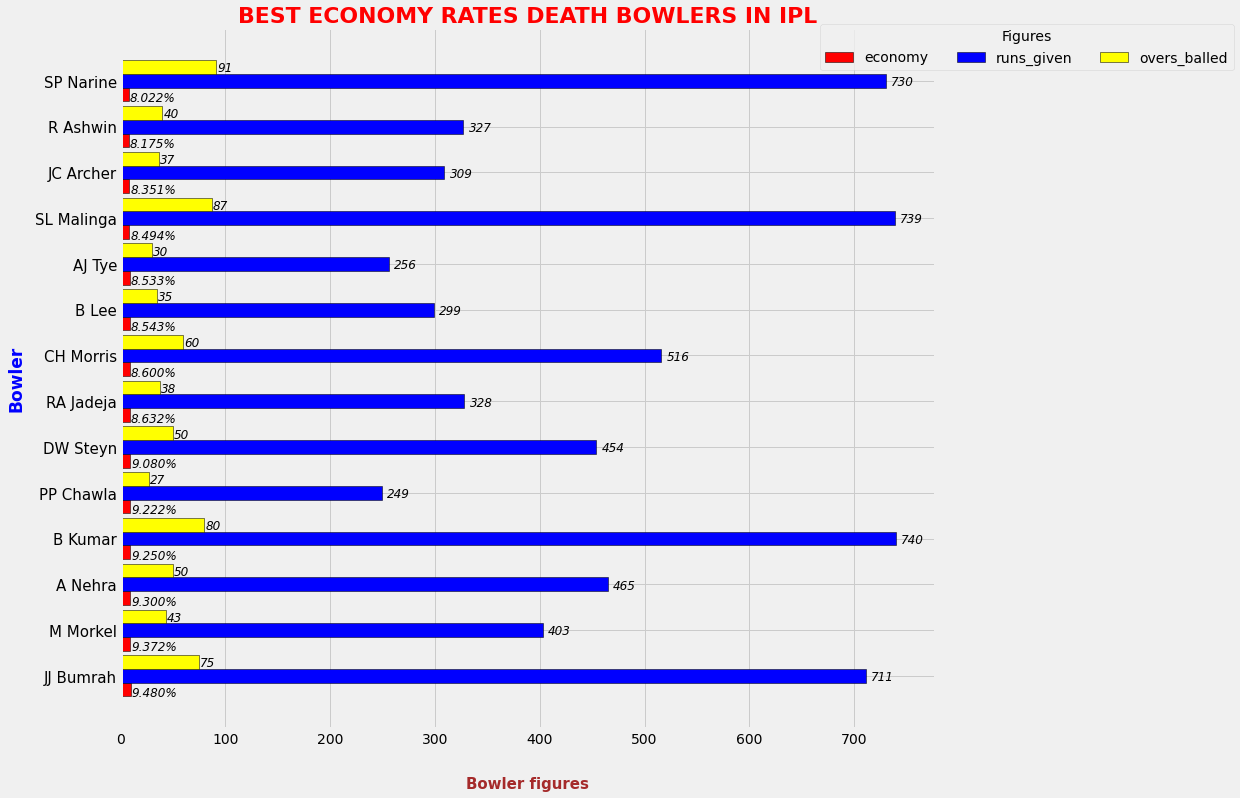

In [ ]:
bowlers_economy = death_bowlers_runs_given.groupby(['id','bowler','over'], as_index=False)['total_runs'].sum()

bowlers_economy = bowlers_economy.groupby('bowler').agg({'over':'count','total_runs':'sum'})

bowlers_economy['economy'] = bowlers_economy['total_runs']/bowlers_economy['over']
bowlers_economy = bowlers_economy[bowlers_economy['economy'] < 9.5]
bowlers_economy = bowlers_economy[bowlers_economy['over'] > 24]
bowlers_economy = bowlers_economy.sort_values(['economy'])
print(bowlers_economy)


bowlers_economy = bowlers_economy.sort_values('economy',ascending= False)
height = .3
Pos = np.array(range(14))
plt.figure(figsize=(13,12))
plt.style.use('fivethirtyeight')


plt.barh(Pos-height, bowlers_economy['economy'], height = height, edgecolor = 'black', color= 'red', label = 'economy')
plt.barh(Pos, bowlers_economy['total_runs'], height = height, edgecolor = 'black', color= 'blue', label = 'runs_given')
plt.barh(Pos + height, bowlers_economy['over'],  height = height, edgecolor = 'black', color= 'yellow', label='overs_balled' )

plt.yticks(Pos, bowlers_economy.index, fontsize = 15)
plt.title('BEST ECONOMY RATES DEATH BOWLERS IN IPL', fontsize = 22, fontweight='bold' ,color = 'red', y=1)
plt.xlabel('Bowler figures',fontsize= 15 , fontweight='bold', color = 'brown',labelpad = 30)
plt.ylabel('Bowler' , fontsize = 17, fontweight='bold', color = 'blue', labelpad = 10)

plt.legend(bbox_to_anchor =(0.85, 0.93), ncol = 3, title = 'Figures')

for index,data in enumerate(bowlers_economy.economy.values):
    plt.text(x=data+0.9 , y =index -0.45, s=   f"{'%.3f'%(data)}%", fontweight='ultralight', fontsize = 12, fontstyle='italic')

for index,data in enumerate(bowlers_economy.total_runs.values):
    plt.text(x=data+ 5 , y =index -0.1, s=   f"{data}", fontweight='ultralight', fontsize = 12, fontstyle='italic')

for index,data in enumerate(bowlers_economy.over.values):
    plt.text(x=data+ 1 , y =index +0.2, s=   f"{data}", fontweight='ultralight', fontsize = 12, fontstyle='italic')
;
